In this homework, we will use a dataset provided: “D3.csv” Let the first three columns of the data set be separate explanatory variables x1, x2, x3. Let the fourth column be the dependent variable Y. (Note: We will not use the built-in function from ML libraries for gradient descent, you have to implement it yourself.)

# Problem 1.

Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, we assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, we need to do three different training, one per each explanatory variable. For the learning rate, will explore different values between 0.1 and 0.01 . Initialize our parameters to zero (theta to zero). 

1. Will report the linear model we found for each explanatory variable.
2. Will plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4. Based on our training observations, we will describe the impact of the different learning rates on the final loss and number of training iteration.

Mounting Google Drive

In [186]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Loading required python libraries

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading dataset from google drive

In [188]:
#reading from table
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/D3.csv")
X1 = df.values[:, 0]                   
X2 = df.values[:, 1]                     
X3 = df.values[:, 2]                     
y = df.values[:, 3]                      
m = len(y)
print('X1 = ', X1[: 5]) 
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5])
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


Plot-  Output(Y) versus Input X1 (first explanatory variable).

Text(0.5, 1.0, 'Scatter plot of training data')

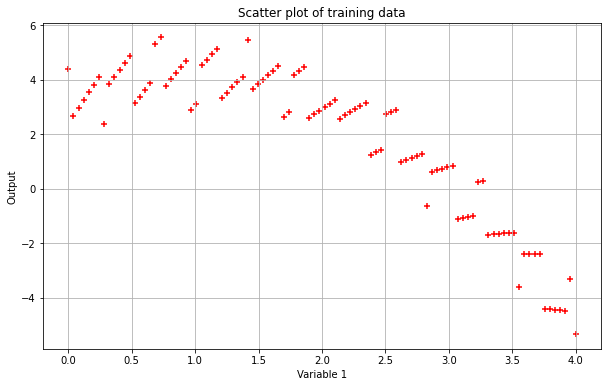

In [189]:
plt.scatter(X1,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Variable 1')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

Plot- Output(Y) versus Input X2 (second explanatory variable).

Text(0.5, 1.0, 'Scatter plot of training data')

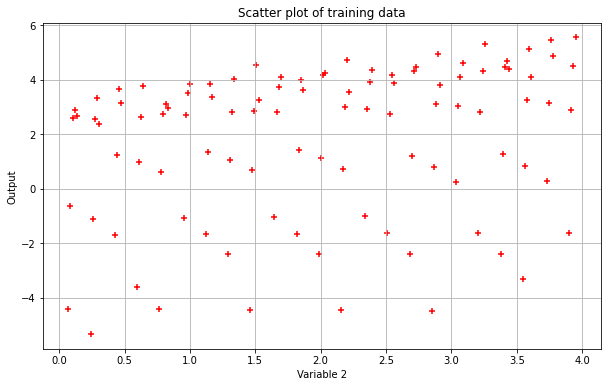

In [190]:
plt.scatter(X2,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Variable 2')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

Plot- Output(Y) versus Input X3 (third explanatory variable).

Text(0.5, 1.0, 'Scatter plot of training data')

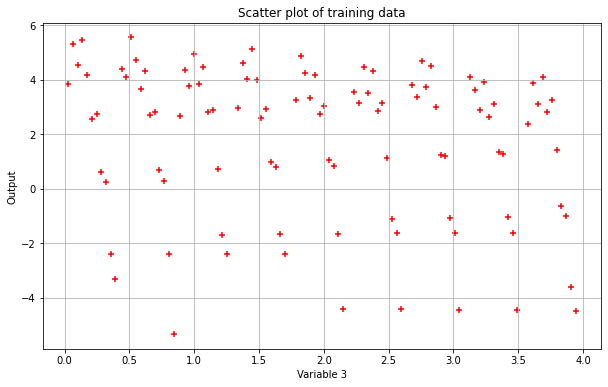

In [191]:
plt.scatter(X3,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Variable 3')
plt.ylabel('Output')
plt.title('Scatter plot of training data')

In [192]:
X_0 = np.ones((m, 1))          
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [193]:
X_1 = X1.reshape(m, 1)           
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
print('X_1 = ', X_1[: 5])
print('X_2 = ', X_2[: 5])
print('X_3 = ', X_3[: 5])

X_1 =  [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]]
X_2 =  [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]]
X_3 =  [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]]


In [194]:
X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])

X1 =  [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
X2 =  [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
X3 =  [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [195]:
theta = np.zeros(2)
theta

array([0., 0.])

Cost Function Definition

In [196]:
def compute_cost(A, y, theta):
    predictions = A.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

Gradient Descent Function Definition

In [197]:
def gradient_descent(A, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = A.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * A.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(A, y, theta)
    
    return theta, cost_history

Initial Cost Calculation for initial model parameter theta

In [198]:
cost_1 = compute_cost(X1, y, theta)
cost_2 = compute_cost(X2, y, theta)
cost_3 = compute_cost(X3, y, theta)
print('The cost for given values of theta and Variable 1 =', cost_1)
print('The cost for given values of theta and Variable 2 =', cost_2)
print('The cost for given values of theta and Variable 3 =', cost_3)

The cost for given values of theta and Variable 1 = 5.524438459196242
The cost for given values of theta and Variable 2 = 5.524438459196242
The cost for given values of theta and Variable 3 = 5.524438459196242


In [199]:
theta = [0., 0.]
iterations = 1800;
alpha = 0.02

### Reporting the linear model for each explanatory variable.

In [200]:
theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)

In [201]:
print("y1_bar=",theta[1],"*(X1) +",theta[0])

y1_bar= -2.0375706765834307 *(X1) + 5.925980914136333


In [202]:
theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)

In [203]:
print("y2_bar=",theta[1],"*(X2) +",theta[0])

y2_bar= 0.5569008366761438 *(X2) + 0.7378763518911728


In [204]:
theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)

In [185]:
print("y3_bar=",theta[1],"*(X3) +",theta[0])

y3_bar= -2.0375706765834307 *(X3) + 5.925980914136333


### Plot of linear model and loss over the iteration for explanatory variable 1

In [214]:
theta, cost_history = gradient_descent(X1, y, theta, alpha, iterations)
print('Final value of theta (Variable 1)=', theta)
print('cost_history (Variable 1) =', cost_history)

Final value of theta (Variable 1)= [ 5.92688076 -2.0379209 ]
cost_history (Variable 1) = [2.47518761 2.41302725 2.3627055  ... 0.98499323 0.98499323 0.98499323]


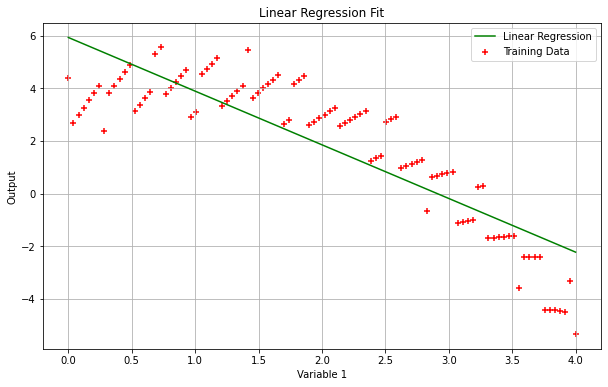

In [215]:
plt.scatter(X1[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X1[:,1],X1.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Variable 1')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

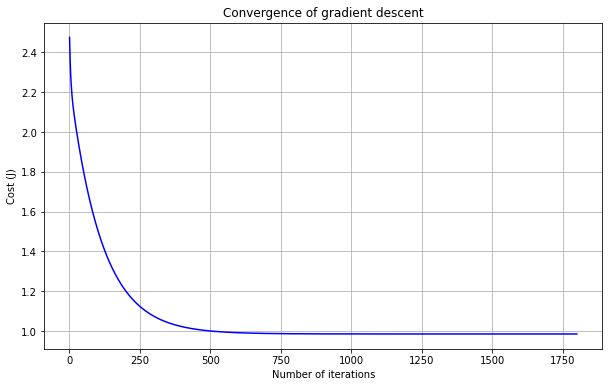

In [216]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

###Plot of linear model and loss over the iteration for explanatory variable 2

In [218]:
theta, cost_history = gradient_descent(X2, y, theta, alpha, iterations)
print('Final value of theta (Variable 2)=', theta)
print('cost_history (Variable 2) =', cost_history)

Final value of theta (Variable 2)= [0.73606104 0.55760737]
cost_history (Variable 2) = [3.59936644 3.59936643 3.59936643 ... 3.59936602 3.59936602 3.59936602]


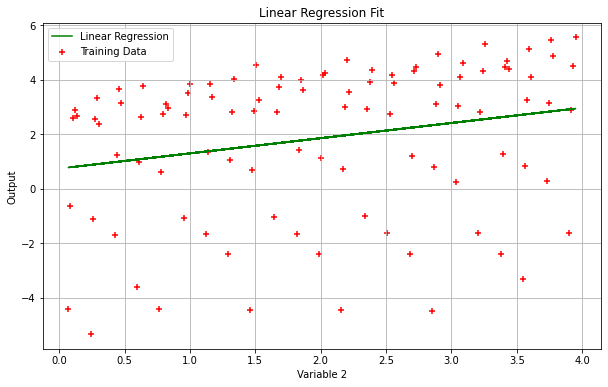

In [219]:
plt.scatter(X2[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X2[:,1],X2.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Variable 2')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

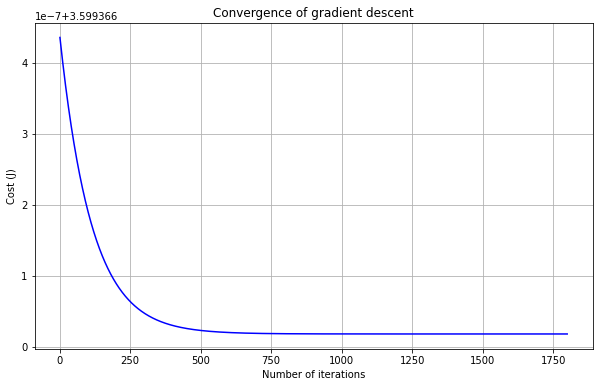

In [220]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

### Plot of linear model and loss over the iteration for explanatory variable 3

In [221]:
theta, cost_history = gradient_descent(X3, y, theta, alpha, iterations)
print('Final value of theta (Variable 3)=', theta)
print('cost_history (Variable 3) =', cost_history)

Final value of theta (Variable 3)= [ 2.87075783 -0.52022017]
cost_history (Variable 3) = [4.37067859 4.34058307 4.3160102  ... 3.62945118 3.62945118 3.62945118]


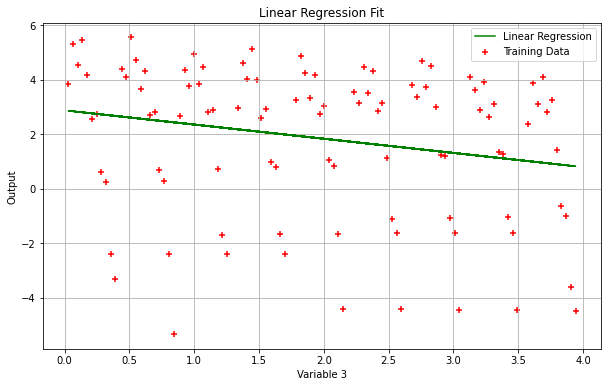

In [222]:
plt.scatter(X3[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X3[:,1],X3.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Variable 3')
plt.ylabel('Output')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

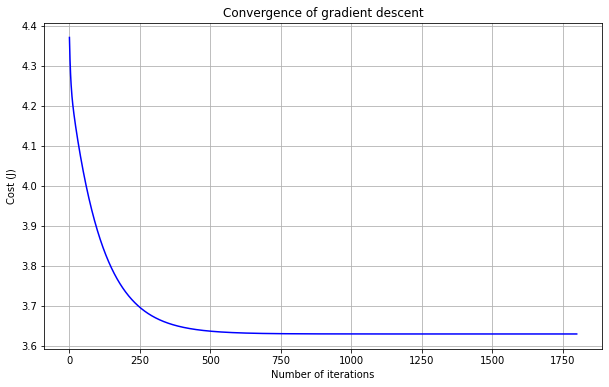

In [223]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

###Based on the training observations, description of the impact of the different learning rates (between 0.1 and 0.01) on the final loss and number of training iteration.

In [224]:
theta = [0., 0.]
iterations = 1800

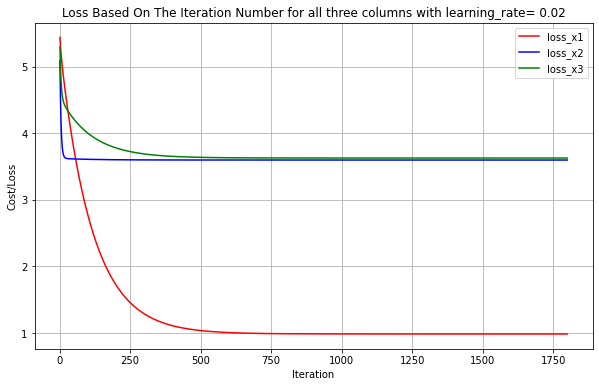

In [226]:
#testing for learning_rate = 0.02
alpha=0.02
theta1, cost_history1 = gradient_descent(X1, y, theta, alpha, iterations)
theta2, cost_history2 = gradient_descent(X2, y, theta, alpha, iterations)
theta3, cost_history3 = gradient_descent(X3, y, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Cost/Loss')
plt.title('Loss Based On The Iteration Number for all three columns with learning_rate= 0.02')
plt.legend(["loss_x1", "loss_x2", "loss_x3"])

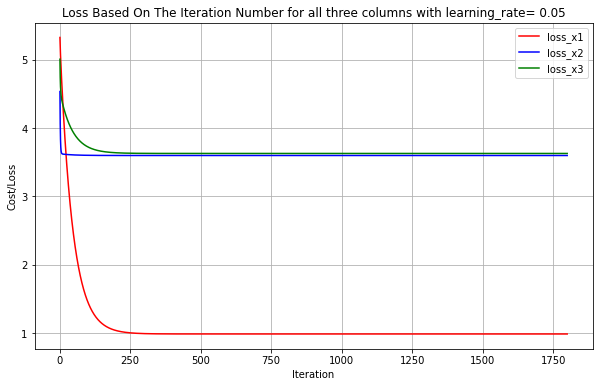

In [227]:
#testing for learning_rate = 0.05
alpha=0.05
theta1, cost_history1 = gradient_descent(X1, y, theta, alpha, iterations)
theta2, cost_history2 = gradient_descent(X2, y, theta, alpha, iterations)
theta3, cost_history3 = gradient_descent(X3, y, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Cost/Loss')
plt.title('Loss Based On The Iteration Number for all three columns with learning_rate= 0.05')
plt.legend(["loss_x1", "loss_x2", "loss_x3"])

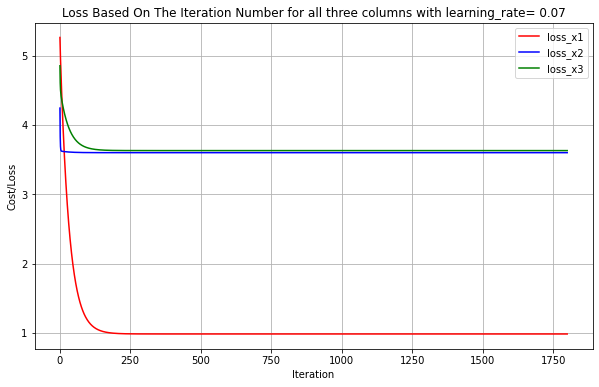

In [229]:
#testing for learning_rate = 0.07
alpha=0.07
theta1, cost_history1 = gradient_descent(X1, y, theta, alpha, iterations)
theta2, cost_history2 = gradient_descent(X2, y, theta, alpha, iterations)
theta3, cost_history3 = gradient_descent(X3, y, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Cost/Loss')
plt.title('Loss Based On The Iteration Number for all three columns with learning_rate= 0.07')
plt.legend(["loss_x1", "loss_x2", "loss_x3"])

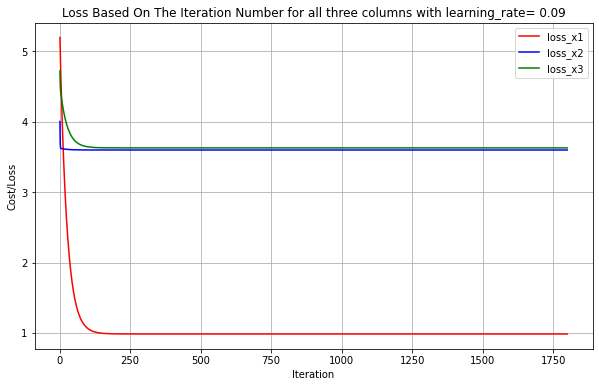

In [230]:
#testing for learning_rate = 0.09
alpha=0.09
theta1, cost_history1 = gradient_descent(X1, y, theta, alpha, iterations)
theta2, cost_history2 = gradient_descent(X2, y, theta, alpha, iterations)
theta3, cost_history3 = gradient_descent(X3, y, theta, alpha, iterations)
plt.plot(range(1, iterations + 1),cost_history1, color='red')
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.plot(range(1, iterations + 1),cost_history3, color='green')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Cost/Loss')
plt.title('Loss Based On The Iteration Number for all three columns with learning_rate= 0.09')
plt.legend(["loss_x1", "loss_x2", "loss_x3"])

We see,when we are using a higher learning rate, our loss functions decrease faster and thus we can reach a minimum loss in fewer iterations. But,if we use a very large learning rate, we may never find the minimum value that means model will diverge. If we use smaller values for our learning rate, we can find the minimum, but it may take more iterations to find the expected result. Here, we see when learning rate is 0.09, convergence is faster (i.e least number of iterations are required). But losses are almost same for all learning rates ( between 0.01 and 0.1).

#Problem 2.

For this problem , we need to run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, we will explore different values between 0.1 and 0.01. We have to initialize the parameters (theta to zero).

1. Will report the final linear model we found the best.
2. Will plot loss over the iteration.
3. Based on our training observations, we will describe the impact of the different learning rates on the final loss and number of training iteration.
4. we will predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [365]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/D3.csv")
X1 = df.values[:, 0]                   
X2 = df.values[:, 1]                     
X3 = df.values[:, 2]                     
y = df.values[:, 3]                      
m = len(y)

In [366]:
X_0 = np.ones((m, 1))            


In [367]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)


In [368]:
X = np.hstack((X_0, X_1, X_2, X_3))

In [346]:
theta = np.zeros(4)

In [369]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [370]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

In [371]:
cost = compute_cost(X, y, theta)

Previously, we seen that learning rate (alpha) 0.09 performed well, so we considered this learning rate.

In [372]:
theta = [0., 0., 0., 0.]
iterations = 1500;
alpha = 0.09

In [373]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)

Final value of theta= [ 5.31416018 -2.00371828  0.53256449 -0.26560084]
cost_history = [4.10038644 3.5871816  3.22984001 ... 0.73846424 0.73846424 0.73846424]


In [374]:
#printing out final linear regression model
print ("y_bar = ", theta[3],"*(x3^3) + ", theta[2],"*(x2^2)", theta[1],"*(x1) + ",theta[0])

y_bar =  -0.2656008408699233 *(x3^3) +  0.532564491251479 *(x2^2) -2.0037182812577115 *(x1) +  5.314160182052157


### For learning rate 0.09

In [375]:
alpha1 = 0.09
theta = [0., 0., 0., 0.]
iterations = 1500;

In [376]:
theta1, cost_history1 = gradient_descent(X, y, theta, alpha1, iterations)

Text(0.5, 1.0, 'Convergence of gradient descent')

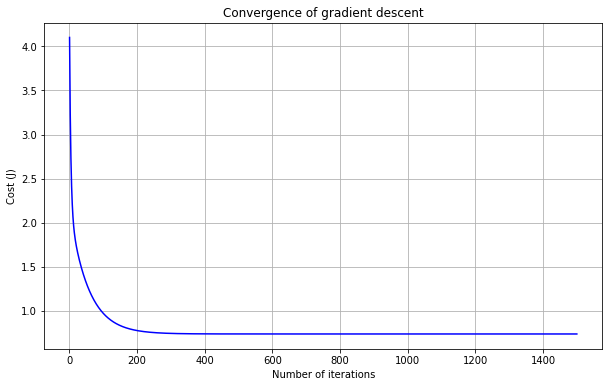

In [377]:
plt.plot(range(1, iterations + 1),cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [378]:
X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])
       
Predictions_new = np.dot(X_new, theta1)
Predictions_new

array([3.57740555, 0.24432026, 0.10253348])

###For learning rate 0.07





In [379]:
alpha2 = 0.07
theta = [0., 0., 0., 0.]
iterations = 1500;
theta2, cost_history2 = gradient_descent(X, y, theta, alpha2, iterations)

Text(0.5, 1.0, 'Convergence of gradient descent')

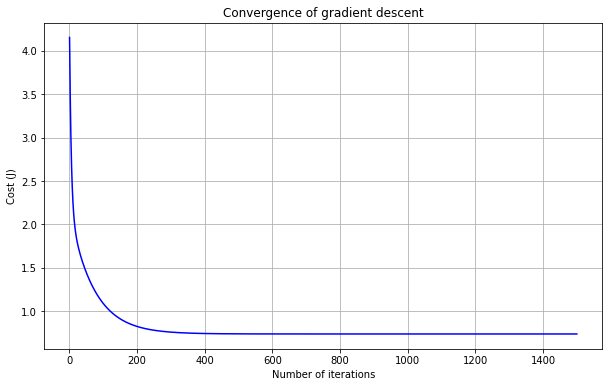

In [380]:
plt.plot(range(1, iterations + 1),cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [381]:
X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])
       
Predictions_new = np.dot(X_new, theta2)
Predictions_new

array([3.57733146, 0.24430249, 0.10252005])

###For learning rate 0.05

In [382]:
alpha3 = 0.05
theta = [0., 0., 0., 0.]
iterations = 1500;
theta3, cost_history3 = gradient_descent(X, y, theta, alpha3, iterations)

Text(0.5, 1.0, 'Convergence of gradient descent')

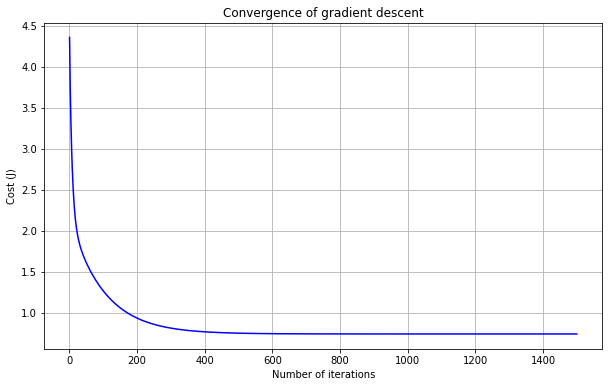

In [383]:
plt.plot(range(1, iterations + 1),cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [384]:
X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])
       
Predictions_new = np.dot(X_new, theta3)
Predictions_new

array([3.5758311 , 0.2439427 , 0.10224809])

###For learning rate 0.02

In [385]:
alpha4 = 0.02
theta = [0., 0., 0., 0.]
iterations = 1500;
theta4, cost_history4 = gradient_descent(X, y, theta, alpha4, iterations)

Text(0.5, 1.0, 'Convergence of gradient descent')

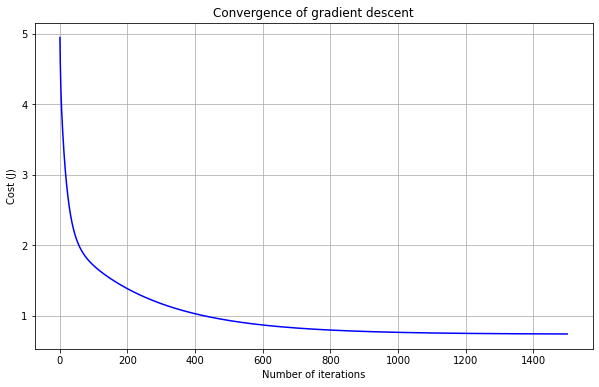

In [386]:
plt.plot(range(1, iterations + 1),cost_history4, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [387]:
X_new = ([1, 1, 1, 1],
        [1, 2, 0, 4],
        [1, 3, 2, 1])
       
Predictions_new = np.dot(X_new, theta4)
Predictions_new

array([3.43513125, 0.21020309, 0.0767448 ])

Here, we see that, if the learning rate value is increased, the number of iterations is decreased to reach the same amount of loss or cost value.